# DESCRIPCIÓN Img2WaCo Paso 1 de imagen a Acuarela 
Este módulo, basado en programación utilizada por google tensorflow hub https://www.kaggle.com · Released under the Apache 2.0 open source license, Utiliza el módulo de google preentrenado: fhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2, para realizar la transferencia de estilos, como veremos es resultado es mediocre ya la imagen resultante tiene muchas interferencias y ruido. En un segunda fase trasnformaremos la imagen para obtener un buen resultado.


In [1]:
import functools
import os
from PIL import Image

from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
# @title Define image loading and visualization functions  { display-mode: "form" }

def crop_center(image):
    """Returns a cropped square image."""
    shape = image.shape
    new_shape = min(shape[1], shape[2])
    offset_y = max(shape[1] - shape[2], 0) // 2
    offset_x = max(shape[2] - shape[1], 0) // 2
    image = tf.image.crop_to_bounding_box(
        image, offset_y, offset_x, new_shape, new_shape)
    return image

@functools.lru_cache(maxsize=None)
def load_image(image_path, image_size=(512, 512), preserve_aspect_ratio=True):
    """Loads and preprocesses images."""
    # Load and convert to float32 numpy array, add batch dimension, and normalize to range [0, 1].
    img = tf.io.decode_image(
        tf.io.read_file(image_path),
        channels=3, dtype=tf.float32)[tf.newaxis, ...]
    img = crop_center(img)
    img = tf.image.resize(img, image_size, preserve_aspect_ratio=True)
    return img

def show_n(images, titles=('',)):
    n = len(images)
    image_sizes = [image.shape[1] for image in images]
    w = (image_sizes[0] * 6) // 320
    plt.figure(figsize=(w * n, w))
    gs = gridspec.GridSpec(1, n, width_ratios=image_sizes)
    for i in range(n):
        plt.subplot(gs[i])
        plt.imshow(images[i][0], aspect='equal')
        plt.axis('off')
        plt.title(titles[i] if len(titles) > i else '')
    plt.show()
# Specify the file pathsº
content_image_path = 'mv.jpg'
style_image_path = 'mp.jpg'
output_image_size = 768  # @param {type:"integer"}

# Load content image
content_img_size = (output_image_size, output_image_size)
style_img_size = (512, 512)  # Recommended to keep it at 256.

# Load content image
content_image = load_image(content_image_path, content_img_size)

# Load style image
style_image = load_image(style_image_path, style_img_size)
style_image = tf.nn.avg_pool(style_image, ksize=[3,3], strides=[1,1], padding='SAME')

# Display images
show_n([content_image, style_image], ['Content image', 'Style image'])


Este código realiza varias funciones relacionadas con la carga y preprocesamiento de imágenes, así como la visualización de las mismas. Aquí está la explicación detallada:

1. **Importación de bibliotecas:**
   - Importamos varias bibliotecas necesarias para el procesamiento de imágenes, incluyendo TensorFlow y TensorFlow Hub para cargar y procesar modelos pre-entrenados, y Matplotlib para visualización de imágenes.

2. **Definición de funciones para cargar y visualizar imágenes:**
   - `crop_center(image)`: Esta función recorta una imagen cuadrada centrada a partir de una imagen rectangular. Se utiliza para garantizar que las imágenes tengan las mismas dimensiones antes de ser procesadas.
   - `load_image(image_path, image_size=(512, 512), preserve_aspect_ratio=True)`: Esta función carga y preprocesa una imagen dada su ruta de archivo. Lee la imagen de un archivo, la convierte en un tensor de tipo float32, la redimensiona y la normaliza para que esté en el rango [0, 1]. Utiliza el caché de funciones `functools.lru_cache` para almacenar en caché las imágenes cargadas, lo que puede mejorar la velocidad de carga si se cargan varias veces.
   - `show_n(images, titles=('',))`: Esta función muestra una lista de imágenes junto con sus títulos correspondientes utilizando la biblioteca Matplotlib para visualización. Es útil para comparar imágenes lado a lado.

3. **Especificación de rutas de archivos y tamaños de imagen:**
   - `content_image_path` y `style_image_path`: Estas variables especifican las rutas de archivo de la imagen de contenido y la imagen de estilo, respectivamente.
   - `output_image_size`: Este parámetro especifica el tamaño de la imagen de salida deseada.

4. **Carga de imágenes:**
   - `content_image`: Carga la imagen de contenido utilizando la función `load_image` con el tamaño de imagen especificado en `content_img_size`.
   - `style_image`: Carga la imagen de estilo utilizando la función `load_image` con el tamaño de imagen especificado en `style_img_size`. Además, aplica una operación de promedio de pooling para reducir el tamaño de la imagen de estilo, lo que puede mejorar la velocidad de procesamiento.

5. **Visualización de imágenes:**
   - Utiliza la función `show_n` para mostrar la imagen de contenido y la imagen de estilo con sus respectivos títulos.

En resumen, este código carga y preprocesa imágenes de contenido y estilo, y luego las muestra para su inspección visual antes de aplicar cualquier transformación adicional, como la transferencia de estilo. Estas funciones son esenciales para la preparación de datos antes de utilizar modelos de redes neuronales para tareas de procesamiento de imágenes, como la transferencia de estilo.

Explicación detallada sobre TensorFlow y TensorFlow Hub:

1. **TensorFlow:**
   - **Desarrollador y Uso:** TensorFlow es una biblioteca de código abierto desarrollada por Google Brain Team para realizar cálculos numéricos eficientes y crear modelos de aprendizaje automático, especialmente redes neuronales. Se utiliza ampliamente en investigación y producción para una variedad de tareas de aprendizaje automático y procesamiento de datos, como clasificación de imágenes, procesamiento de lenguaje natural, y más.
   - **Características y Funcionalidades:** TensorFlow proporciona una interfaz de programación flexible y extensible que permite a los desarrolladores crear y entrenar modelos de aprendizaje automático de manera eficiente. Ofrece características como gráficos computacionales para definir y ejecutar operaciones matemáticas, optimizadores para entrenar modelos, y una variedad de herramientas y bibliotecas adicionales para simplificar el desarrollo de modelos de aprendizaje automático.
   - **Usos Comunes:** TensorFlow se utiliza en una amplia gama de aplicaciones, desde investigación en inteligencia artificial hasta desarrollo de productos comerciales. Es especialmente popular en la comunidad de aprendizaje automático debido a su flexibilidad, escalabilidad y soporte para una variedad de dispositivos y plataformas, incluyendo CPUs, GPUs y TPUs.

2. **TensorFlow Hub:**
   - **Desarrollador y Uso:** TensorFlow Hub es una biblioteca desarrollada por Google que proporciona una plataforma para compartir, descubrir y reutilizar módulos pre-entrenados de aprendizaje profundo. Estos módulos, también conocidos como "módulos de TensorFlow Hub", son modelos de aprendizaje automático pre-entrenados y componentes reutilizables que pueden ser utilizados para tareas específicas de procesamiento de datos, como la clasificación de imágenes, la extracción de características y la transferencia de estilo.
   - **Características y Funcionalidades:** TensorFlow Hub simplifica el proceso de integración de modelos pre-entrenados en aplicaciones de aprendizaje automático al proporcionar una interfaz unificada y fácil de usar para buscar y descargar módulos, así como para utilizarlos en código. Los módulos de TensorFlow Hub son compatibles con TensorFlow y se pueden cargar y utilizar directamente en modelos personalizados.
   - **Usos Comunes:** TensorFlow Hub se utiliza en una variedad de aplicaciones de aprendizaje automático para acelerar el desarrollo y mejorar el rendimiento de los modelos. Los usuarios pueden aprovechar los módulos pre-entrenados disponibles en TensorFlow Hub para tareas comunes de procesamiento de datos, como la clasificación de imágenes con modelos como Inception, la detección de objetos con modelos como SSD, y la generación de texto con modelos de lenguaje natural como BERT. Además, los usuarios también pueden contribuir con sus propios módulos pre-entrenados a TensorFlow Hub para compartir sus avances y contribuir a la comunidad de aprendizaje automático.

In [2]:
# Load TF Hub module.

hub_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
hub_module = hub.load(hub_handle)

# Stylize content image with given style image.
# This is pretty fast within a few milliseconds on a GPU.

outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

Este segundo paso del código implica cargar un módulo de TensorFlow Hub y utilizarlo para estilizar una imagen de contenido con una imagen de estilo. Aquí está la explicación detallada:

1. **Carga del Módulo de TensorFlow Hub:**
   - `hub_handle`: Esta variable contiene la URL del módulo de TensorFlow Hub que se va a cargar. En este caso, el módulo es "Arbitrary Image Stylization" de Magenta, que permite estilizar imágenes con un estilo dado.
   - `hub_module = hub.load(hub_handle)`: Utilizando la función `hub.load()`, el módulo especificado por `hub_handle` se carga en la memoria. Este módulo contiene el modelo pre-entrenado necesario para realizar la transferencia de estilo.

2. **Estilización de la Imagen de Contenido:**
   - `outputs = hub_module(tf.constant(content_image), tf.constant(style_image))`: Se utiliza el módulo cargado para estilizar la imagen de contenido (`content_image`) con la imagen de estilo (`style_image`). El método `tf.constant()` se utiliza para convertir las imágenes cargadas en tensores constantes de TensorFlow antes de pasarlas al módulo de TensorFlow Hub.
   - `stylized_image = outputs[0]`: La salida del módulo de TensorFlow Hub es una lista de tensores que contiene la imagen estilizada. En este caso, tomamos el primer elemento de la lista (`outputs[0]`), que representa la imagen estilizada, y lo asignamos a la variable `stylized_image`.

En resumen, este paso del código carga un módulo pre-entrenado de TensorFlow Hub que se utiliza para estilizar una imagen de contenido con una imagen de estilo específica. La estilización se realiza utilizando el modelo contenido en el módulo, y la imagen estilizada resultante se almacena en la variable `stylized_image`. Este proceso es bastante rápido, especialmente cuando se ejecuta en una GPU, y proporciona una manera eficiente de aplicar efectos de estilo a las imágenes.

Vamos a profundizar en el módulo "Arbitrary Image Stylization" de TensorFlow Hub:

1. **Origen y Desarrollo:**
   - El módulo "Arbitrary Image Stylization" es parte del proyecto Magenta, desarrollado por Google. Magenta es un proyecto de investigación de código abierto que explora la creatividad y la inteligencia artificial, especialmente en el ámbito de la generación de contenido artístico y musical.
   - Este módulo específico ha sido desarrollado por investigadores de Google y la comunidad de código abierto para proporcionar una manera conveniente y eficiente de aplicar estilos artísticos a imágenes de contenido.

2. **Funcionamiento y Características:**
   - El módulo "Arbitrary Image Stylization" utiliza técnicas de redes neuronales convolucionales (CNN) para realizar la transferencia de estilo entre una imagen de contenido y una imagen de estilo.
   - Utiliza un enfoque conocido como "estilización de imágenes con redes neuronales convolucionales" (neural style transfer), que combina los contenidos de una imagen de contenido con los estilos de una imagen de estilo para generar una nueva imagen que conserva el contenido de la imagen original pero adopta el estilo de la imagen de estilo.
   - El módulo ha sido entrenado previamente en un conjunto de datos diverso de imágenes de contenido y estilos artísticos para aprender a capturar y transferir una amplia gama de estilos artísticos a diferentes tipos de contenido.
   - Una característica notable de este módulo es su capacidad para aplicar estilos de manera arbitraria, lo que significa que los usuarios pueden elegir cualquier imagen como estilo de entrada, lo que permite una amplia variedad de posibilidades creativas.

3. **Usos y Aplicaciones:**
   - El módulo "Arbitrary Image Stylization" es útil para una variedad de aplicaciones creativas y de procesamiento de imágenes. Algunos ejemplos incluyen:
     - Creación de arte digital: Permite a los artistas aplicar estilos artísticos específicos a sus imágenes digitales para crear obras de arte únicas y expresivas.
     - Estilización de contenido multimedia: Se puede utilizar para estilizar imágenes y videos con estilos artísticos específicos, lo que puede mejorar la estética visual de contenido multimedia como videos musicales, presentaciones y producciones cinematográficas.
     - Personalización de contenido: Puede ser utilizado por diseñadores gráficos y desarrolladores para personalizar y mejorar la apariencia de contenido web, aplicaciones móviles y juegos mediante la aplicación de estilos visuales distintivos.
     - Investigación y experimentación: Ofrece a los investigadores y entusiastas de la inteligencia artificial una herramienta para explorar y experimentar con técnicas de transferencia de estilo y expresión artística utilizando redes neuronales convolucionales.

En resumen, el módulo "Arbitrary Image Stylization" de TensorFlow Hub proporciona una forma poderosa y flexible de aplicar estilos artísticos a imágenes de contenido, lo que permite una amplia gama de posibilidades creativas y aplicaciones prácticas en el ámbito del procesamiento de imágenes y la generación de contenido artístico.

Terminamos nuestro código

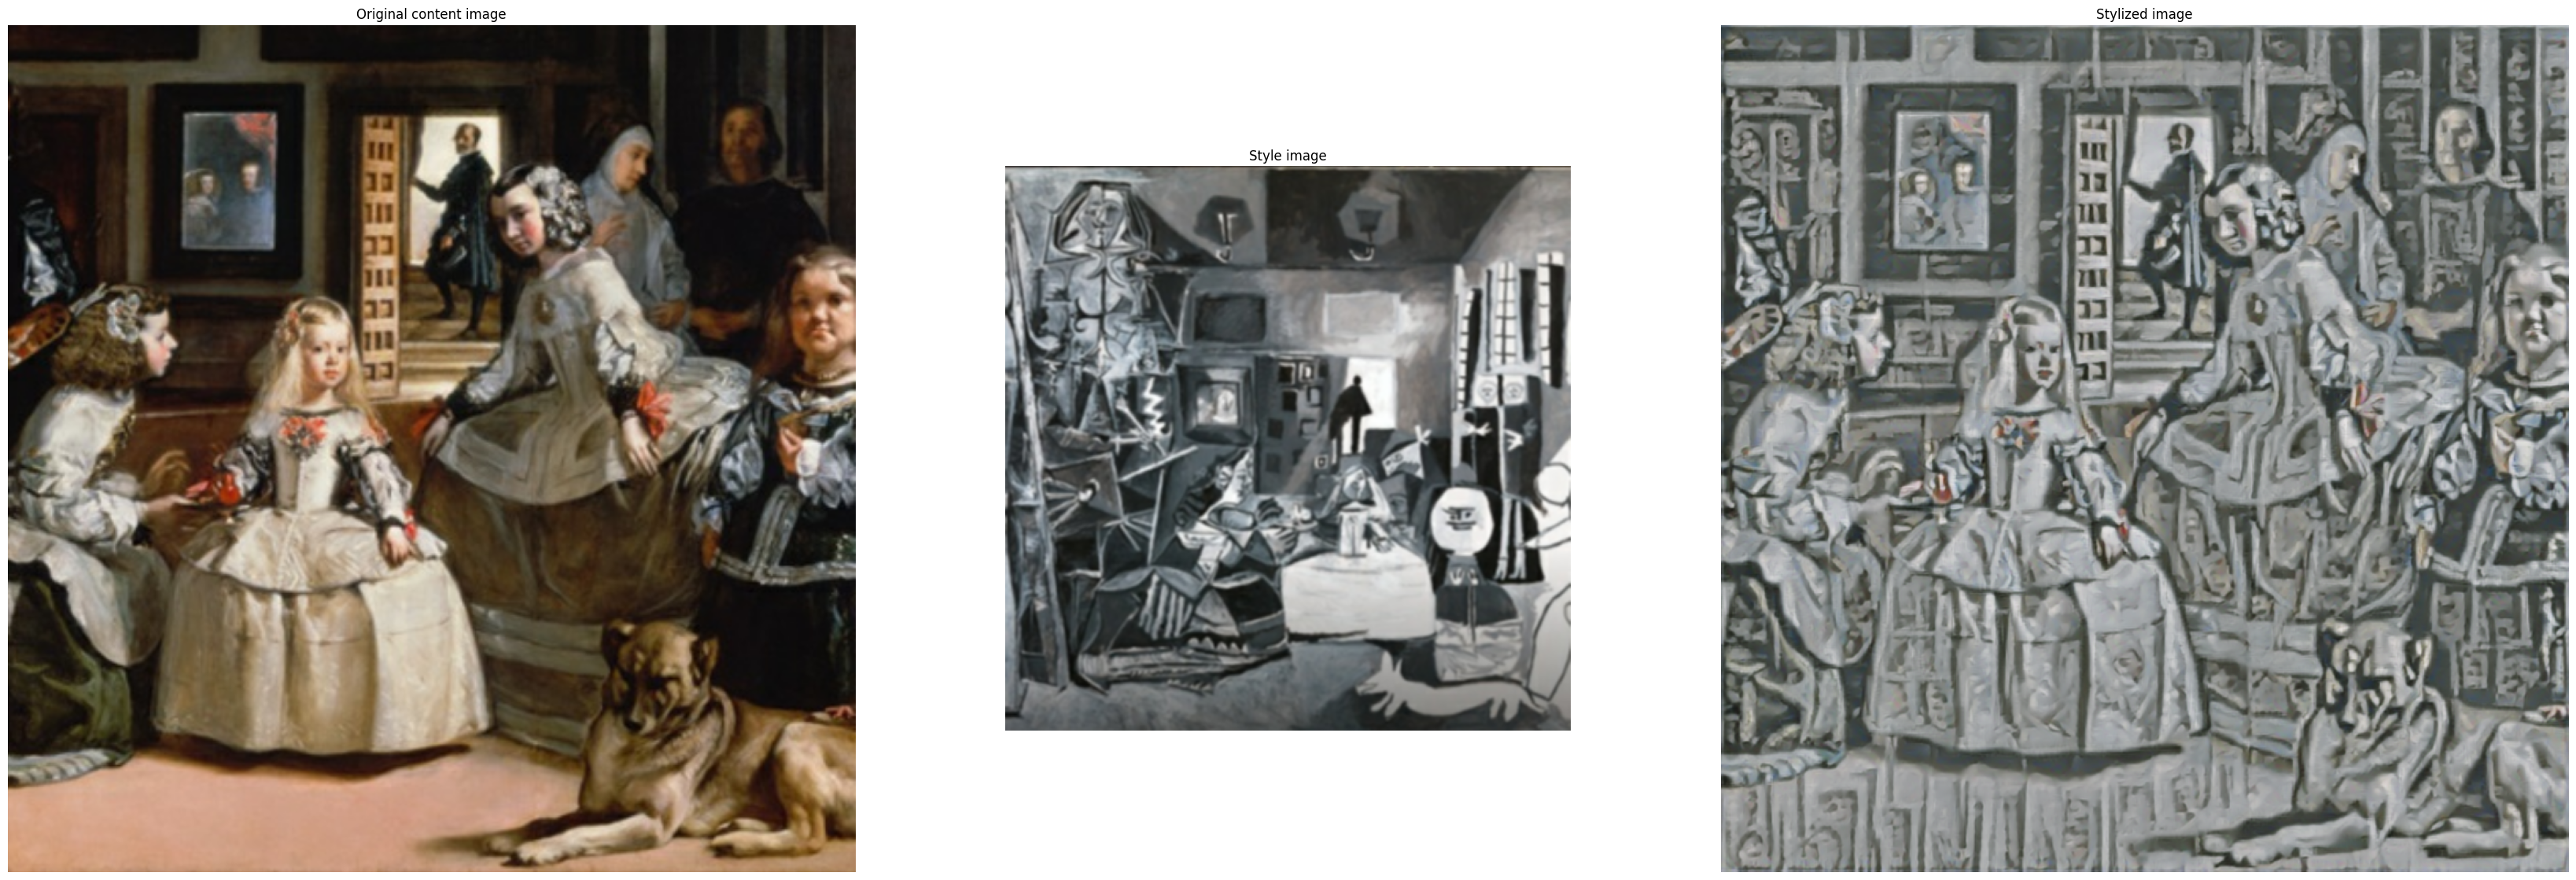

Image shape: (768, 768, 3)
Image data type: float32


In [3]:
# Visualize input images and the generated stylized image.

show_n([content_image, style_image, stylized_image], titles=['Original content image', 'Style image', 'Stylized image'])

import cv2
import numpy as np

# Assuming you have `stylized_image` variable containing the stylized image

# Check if the image is not None and has valid shape
if stylized_image is not None and stylized_image.shape[0] == 1:
    # Extract the actual image from the batch format
    image = np.squeeze(stylized_image.numpy(), axis=0)

    # Print the characteristics of the image
    print("Image shape:", image.shape)
    print("Image data type:", image.dtype)

    # Convert the image from floating point [0, 1] to uint8 [0, 255]
    image_uint8 = (image * 255).astype(np.uint8)

    # Specify the path and filename where you want to save the stylized image
    filename = "picture.png"

    # Save the image to the specified file
    cv2.imwrite(filename, cv2.cvtColor(image_uint8, cv2.COLOR_RGB2BGR))
else:
    print("Error: Stylized image is None or has invalid shape, cannot save.")


Este bloque de código final visualiza las imágenes de entrada y la imagen estilizada generada, y luego guarda la imagen estilizada en un archivo. Aquí tienes una explicación detallada:

1. **Visualización de Imágenes:**
   - Se utiliza la función `show_n` para mostrar las tres imágenes: la imagen de contenido original, la imagen de estilo y la imagen estilizada generada.
   - Cada imagen se muestra junto con un título correspondiente.

2. **Guardado de la Imagen Estilizada:**
   - Primero, se verifica si la variable `stylized_image` no es `None` y tiene una forma válida.
   - Si la verificación es exitosa, se extrae la imagen real de la variable `stylized_image` y se convierte de un formato de tensor a una matriz NumPy.
   - Luego, se imprime la forma y el tipo de datos de la imagen.
   - La imagen se convierte de punto flotante en el rango [0, 1] a entero sin signo en el rango [0, 255] utilizando la operación de escalamiento.
   - Se especifica la ruta y el nombre de archivo donde se guardará la imagen estilizada.
   - Finalmente, la imagen se guarda en el archivo especificado utilizando OpenCV.

Este bloque de código garantiza que la imagen estilizada generada se guarde correctamente en un archivo PNG en la ubicación especificada. Si por alguna razón la imagen estilizada es `None` o tiene una forma inválida, se imprime un mensaje de error indicando que la imagen no se puede guardar.

El código que hemos analizado es una implementación de transferencia de estilo de imágenes utilizando TensorFlow y TensorFlow Hub. Proporciona una manera conveniente de aplicar diferentes estilos artísticos a las imágenes de contenido, lo que permite crear imágenes estilizadas únicas y creativas. Aquí tienes una visión general y una valoración completa del código:

1. **Funcionalidad Principal:**
   - El código carga una imagen de contenido y una imagen de estilo.
   - Utiliza un modelo de TensorFlow Hub para aplicar el estilo de la imagen de estilo a la imagen de contenido.
   - Finalmente, visualiza las imágenes de entrada y la imagen estilizada generada, y guarda la imagen estilizada en un archivo.

2. **Facilidad de Uso:**
   - El código es relativamente fácil de entender y utilizar, especialmente para aquellos familiarizados con TensorFlow y TensorFlow Hub.
   - La modularidad del código permite cambiar fácilmente las imágenes de contenido y estilo, así como experimentar con diferentes modelos de TensorFlow Hub para obtener resultados variados.

3. **Rendimiento:**
   - El rendimiento del código depende en gran medida del modelo de TensorFlow Hub utilizado y del hardware disponible.
   - Para obtener resultados más rápidos, se recomienda ejecutar el código en un entorno con GPU.

4. **Posibles Mejoras:**
   - Una posible mejora sería agregar más opciones de personalización, como ajustar los parámetros de los modelos de transferencia de estilo para obtener resultados más específicos.
   - También se podría explorar la posibilidad de utilizar técnicas de preprocesamiento y postprocesamiento adicionales para mejorar la calidad de las imágenes estilizadas.
   - Además, se podría considerar la implementación de un bucle de optimización para ajustar dinámicamente los parámetros del modelo y mejorar la calidad de las imágenes estilizadas.

En resumen, el código proporciona una forma eficiente y conveniente de aplicar transferencia de estilo de imágenes utilizando modelos preentrenados de TensorFlow Hub. Con algunas mejoras y ajustes adicionales, este código podría ser una herramienta valiosa para crear imágenes estilizadas personalizadas en una variedad de aplicaciones creativas.